<a href="https://colab.research.google.com/github/DM2003/Spartificial-yt-acads-projs/blob/main/Copy_of_Predicting_stars_quasars_and_galaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Debangan Mukherjee

In [ ]:
''' Operating System Functionality '''
import os

''' Data Handling and linear algebra '''
import numpy as np
import pandas as pd

''' Data visualization '''
import matplotlib.pyplot as plt
import seaborn as sns

''' Manipulating Data and model building '''
import tensorflow as tf
from tensorflow import keras

''' Data analysis '''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

''' Measuring classification performance '''
from sklearn.metrics import accuracy_score

''' Classification and Regression '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

''' Ignore warnings '''
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# Importing the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames :
    print(os.path.join(dirname, filename))

Exploratory Analysis

In [ ]:
data = pd.read_csv('/content/SLOAN DIGITAL SKY SURVEY 2014.zip')

In [ ]:
print(data)

             objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22

In [ ]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
data.shape

(10000, 18)

In [ ]:
# We are dropping the object id column since they are of no use in our analysis
data.drop(['objid', 'specobjid'], axis = 1, inplace = True)

In [ ]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [ ]:
data.shape

(10000, 16)

In [ ]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
# Checking for null values to determine completeness of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


The target from data is data classification to Star, Galaxy or Quasar, so the class column has 3 categories and in this case, we need to convert them into numeric data

In [ ]:
le = LabelEncoder().fit(data['class'])
data ['class'] = le.transform (data['class'])

In [ ]:
# Printing dataset after all the changes
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


Glaxies have thus been encoded by 0, Quassars by 1 and Stars by 2

In [ ]:
# checking information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


Perform train and test split

In [ ]:
X = data.drop('class', axis = 1)
Y = data['class'].astype(str)

In [ ]:
print(X)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  rerun  camcol  

In [ ]:
print(Y)

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: object


DATA SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler( copy = True, with_mean = True, with_std = True)
X = scaler.fit_transform(X)

In [ ]:
# Showing data. We are having a look at the first 20 columms scaled here
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [ ]:
# Performing 30% test and 70% train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 128)

DENSITY DISTRIBUTION PLOTS

<Axes: xlabel='class', ylabel='count'>

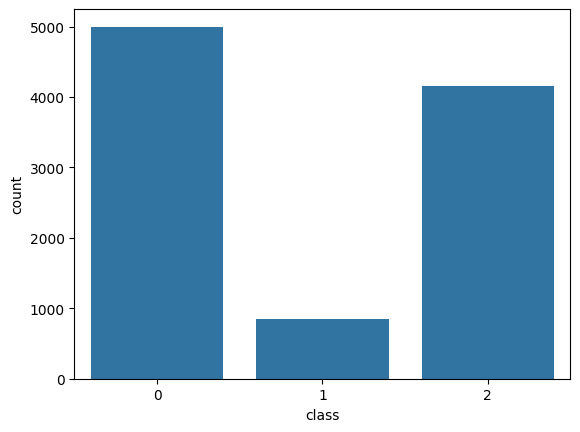

In [ ]:
# Checking the no of labels for each class of the dataset where 0 = Galaxy, 1 = Quassar and 2 = Star
sns.countplot(x = data['class'])

Info about the filters used while gathering the data:
 U ---> Ultraviolet
 G ---> green
 R ---> red
 I ---> infrared

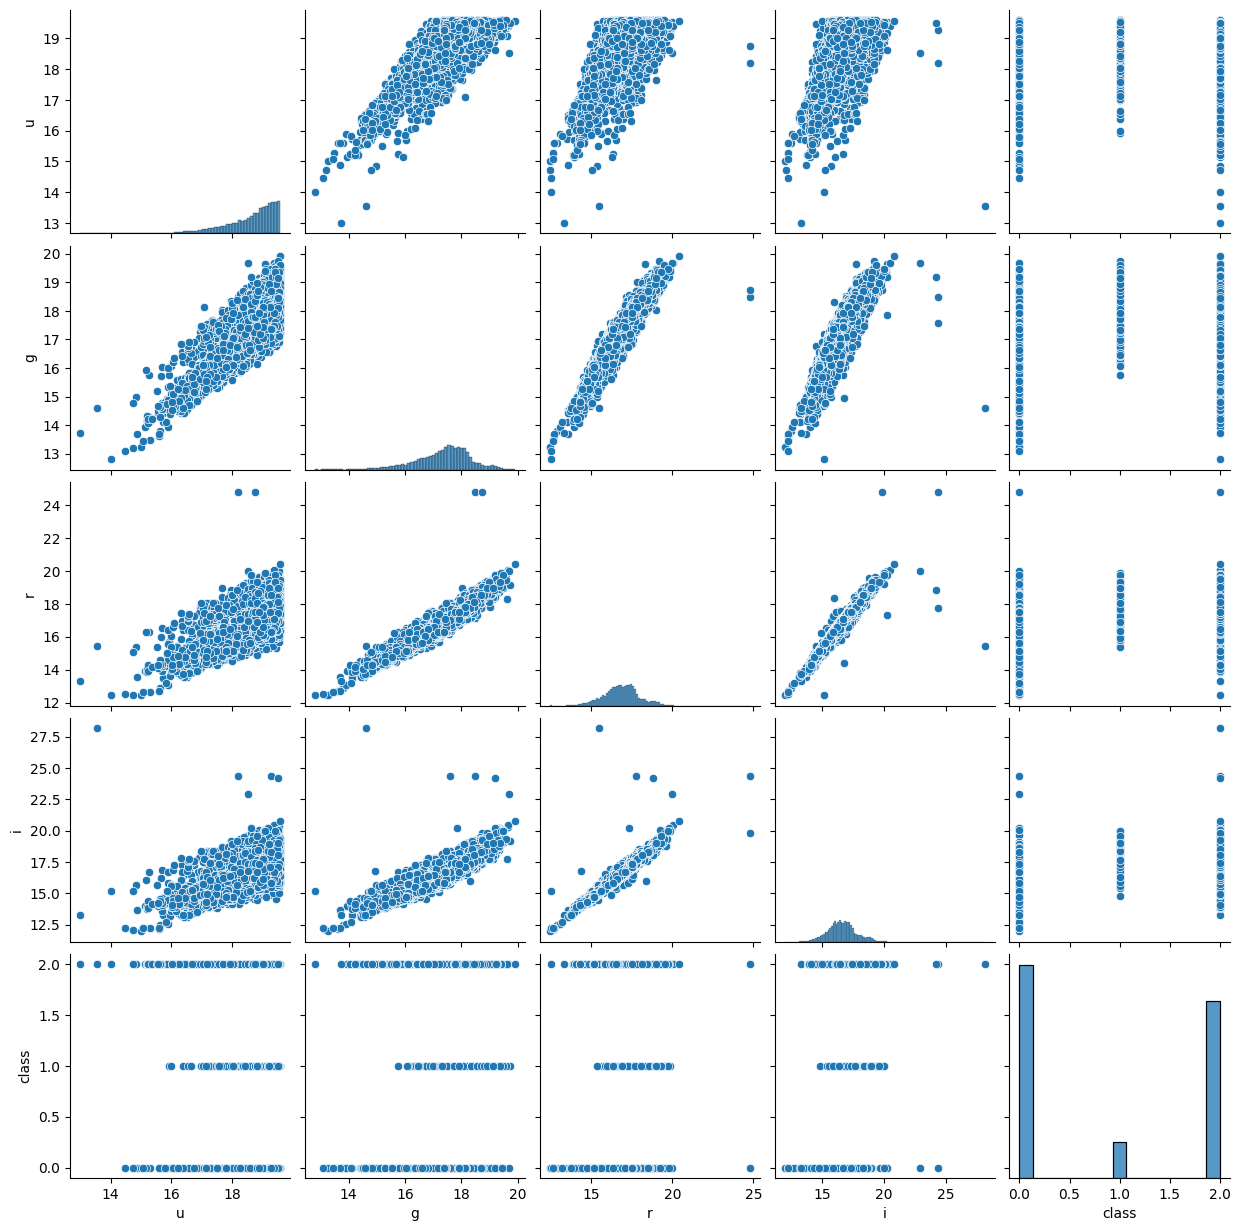

In [ ]:
# Using pairplots to establish and understand interdependency of train features
sns.pairplot(data[['u', 'g', 'r', 'i', 'class']])

CLASSIFICATION MODELS

Decision Tree Clasifier

In [ ]:
dtClassifier = DecisionTreeClassifier(max_leaf_nodes = 15, max_depth = 3)

Linear Regression Classifier

In [ ]:
# Linear Classifier ---- Logistic Regression
LRClassifier = LogisticRegression()

KNN CLASSIFIER

In [ ]:
NeNeClassifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# Fitting the model to the dataset
dtClassifier.fit(X_train, Y_train)
LRClassifier.fit(X_train, Y_train)
NeNeClassifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Getting the prediction set of the models
y_preds = dtClassifier.predict(X_test)
y_predsLR = LRClassifier.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [ ]:
# Displaying the last 10 predictions on the test split as output by all the models
print(y_preds[:10], '\n', Y_test[:10])
print("\n***********************************")
print(y_predsLR[:10], '\n', Y_test[:10])
print("\n***********************************")
print(y_predsNeNe[:10], '\n', Y_test[:10])

['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object

***********************************
['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object

***********************************
['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object


CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m     Decision Tree -\n  \033[0m' , classification_report(y_preds, Y_test, target_names = target_names)+'\n')
print('\033[1m     Linear Regression -\n  \033[0m' , classification_report(y_predsLR, Y_test, target_names = target_names)+'\n')
print("\033[1m    KNN Classifier -\n  \033[0m" , classification_report(y_predsNeNe, Y_test, target_names = target_names)+'\n')


# Precision = (Tp)/(Tp+Fp)
# Recall = (Tp)/(Tp + Fn)
# F1 score = Weighted harmonic mean of precision and recall = [2(Precision  x Recall)]/[Precision + Recall]

     Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


     Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


    KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       2

Visualizing the decision Tree

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from IPython.display import Image
import graphviz
import pydotplus

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
print(data)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  rerun  camcol  

In [ ]:
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)
# Checking if X is a NumPy array and convert it to a  Pandas DataFrame:

In [ ]:
dot_data = export_graphviz(clf, out_file=None, # This function exports the decision tree model clf to DOT format, a graph description language.
                           feature_names=X.columns.tolist(), # Use the column names of X as the feature names in the tree visualization.
                           class_names=np.unique(Y).tolist(),  # Convert unique class labels of Y to string list
                           filled=True, rounded=True, # Fill the nodes with colors to represent different classes. Use rounded boxes for the nodes.
                           special_characters=True) # Allow special characters in the labels.

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
# Converts the DOT data string into a pydotplus graph object, which can be rendered and manipulated.

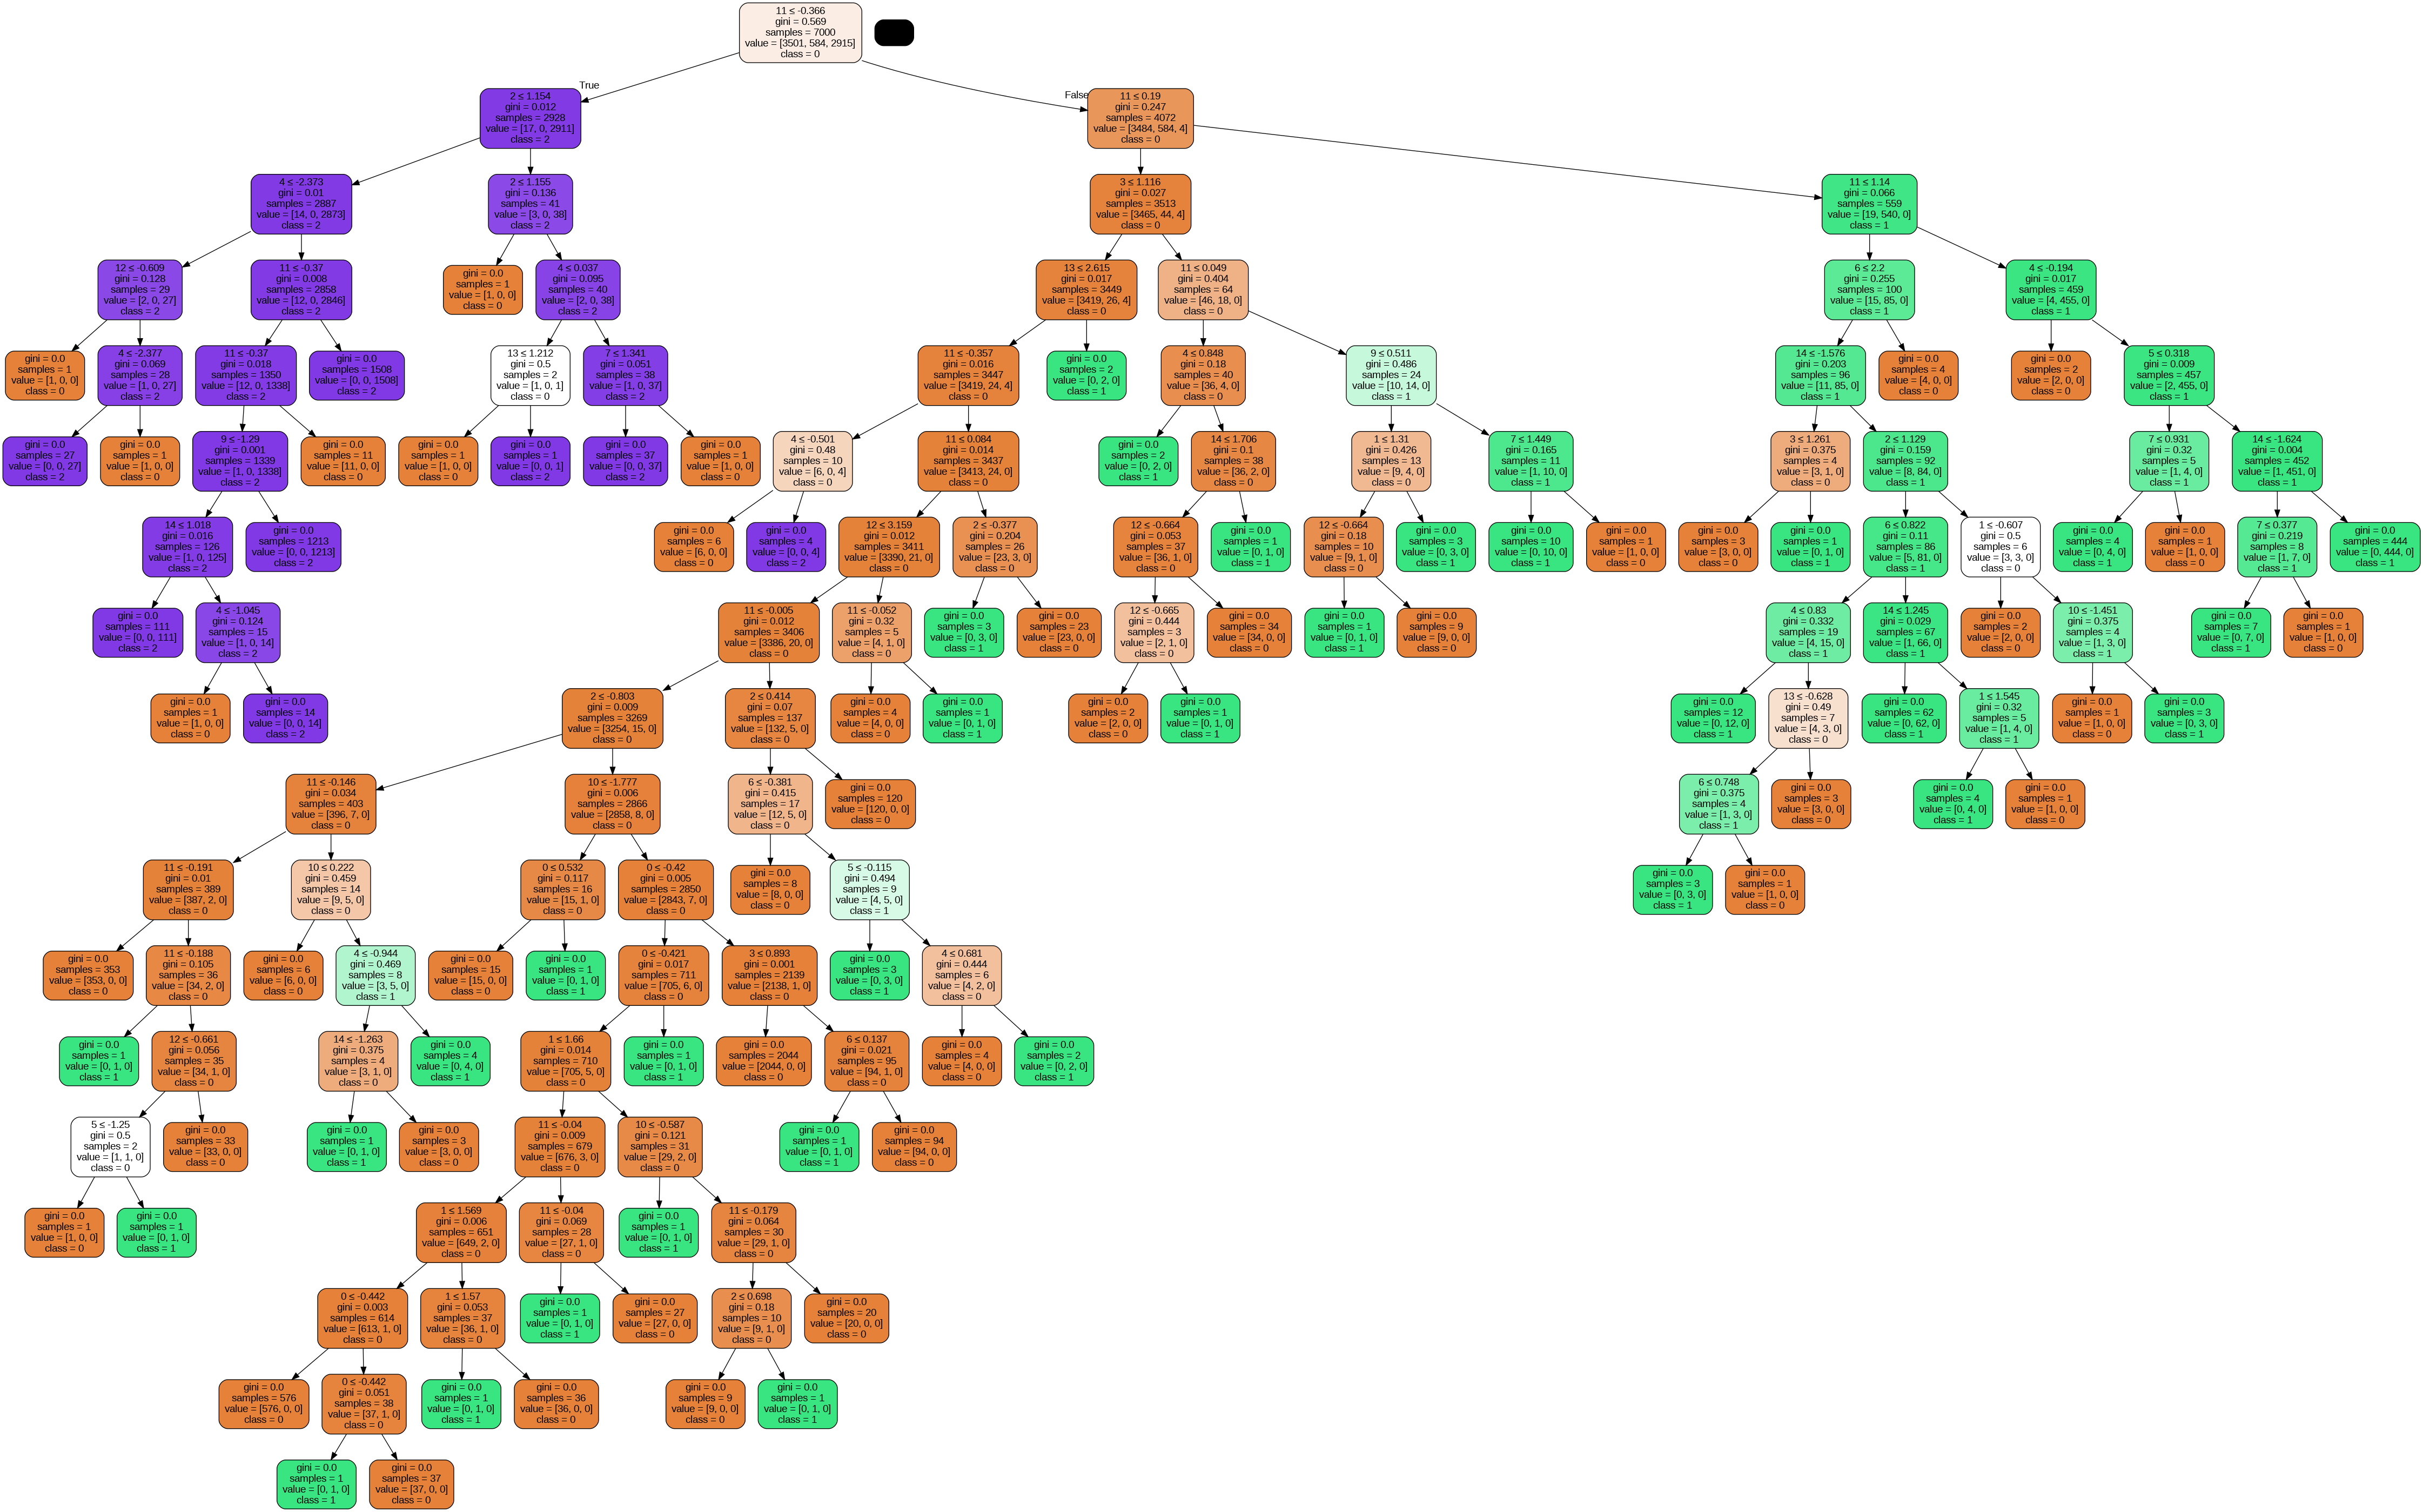

In [ ]:
Image(graph.create_png()) # Generates a PNG image from the graph object

CORRELATION


In [ ]:
correlation = data.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

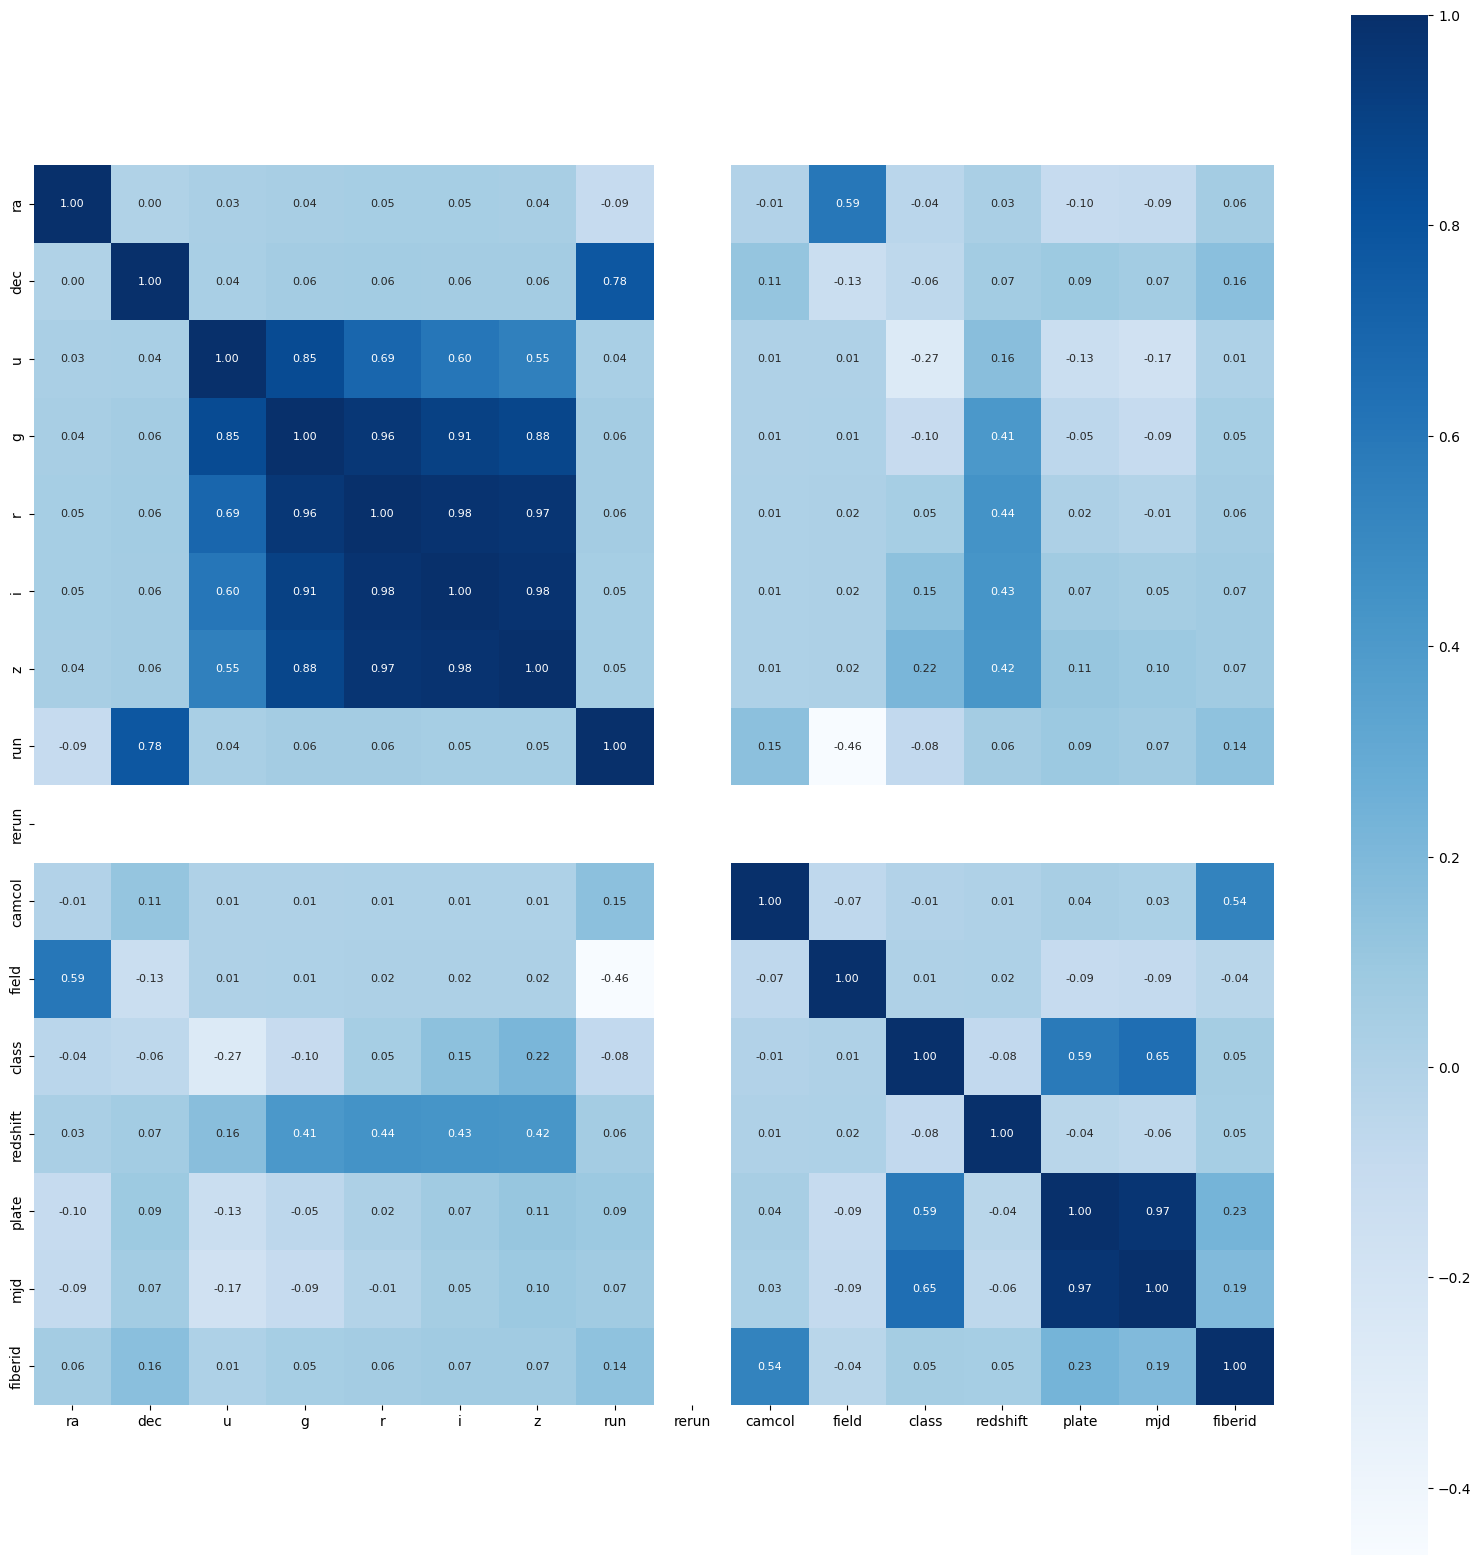

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues' )

In [ ]:
# Model performance improvement ideas:

# From the correlation chart, we can see that the features 'r' and 'i' have a high correlation of 0.99. That is, they are highly redundant and provide similar information. To improve model performance, we can consider dropping one of them.

# Next, the features 'g' and 'r' have a correlation of 0.98, thereby indicating a high degree of redundancy as well. Dropping one of these features could also help reduce multicollinearity and improve model performance.

# Also, the feature 'u' has a relatively low correlation with all the other features of the dataset, suggesting that it may not be as informative for predicting the target variable. Dropping this feature could also potentially improve model performance.

# Based on these observations, we can create a new subset of features by dropping 'i', 'r', and 'u':

X_new = data.drop(['i', 'r', 'u'], axis=1)

# We can then repeat the model training and evaluation process using this new subset of features to see if it improves performance.


In [ ]:
scaler_new = StandardScaler( copy = True, with_mean = True, with_std = True)
X_new = scaler.fit_transform(X_new)

In [ ]:
X_new[:20]

array([[ 0.16745842, -0.58492272, -0.34855938, -0.99534154, -0.83806089,
         0.        ,  0.21085172, -0.21763043,  1.13831973, -0.36973112,
         1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429, -0.16653251, -0.02604308, -0.83806089,
         0.        ,  0.21085172, -0.21763043,  1.13831973, -0.36984929,
        -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.86709322,  0.31452753, -0.83806089,
         0.        ,  0.21085172, -0.21147922, -0.96073933, -0.05302706,
        -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -0.81362749, -0.43092107, -0.83806089,
         0.        ,  0.21085172, -0.20532801,  1.13831973, -0.36999261,
         1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.17251944,  0.15827647, -0.83806089,
         0.        ,  0.21085172, -0.20532801,  1.13831973, -0.36818949,
         1.03148936,  1.30931064,  0.77043128],
       [ 0.17406874, -0.581590

In [ ]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 128)

In [ ]:
dtClassifier_new = DecisionTreeClassifier(max_leaf_nodes = 15, max_depth = 3)

In [ ]:
LRClassifier_new = LogisticRegression()

In [ ]:
NeNeClassifier_new = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
dtClassifier_new.fit(X_new_train, Y_train)
LRClassifier_new.fit(X_new_train, Y_train)
NeNeClassifier_new.fit(X_new_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_preds = dtClassifier_new.predict(X_new_test)
y_predsLR = LRClassifier_new.predict(X_new_test)
y_predsNeNe = NeNeClassifier_new.predict(X_new_test)

In [ ]:
print(y_preds[:10], '\n', Y_test[:10])
print("\n***********************************")
print(y_predsLR[:10], '\n', Y_test[:10])
print("\n***********************************")
print(y_predsNeNe[:10], '\n', Y_test[:10])

['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object

***********************************
['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object

***********************************
['2' '0' '2' '2' '0' '0' '2' '1' '0' '0'] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: object


In [ ]:
target_names = ['0', '1', '2']

print('\033[1m     Decision Tree -\n  \033[0m' , classification_report(y_preds, Y_test, target_names = target_names)+'\n')
print('\033[1m     Linear Regression -\n  \033[0m' , classification_report(y_predsLR, Y_test, target_names = target_names)+'\n')
print("\033[1m    KNN Classifier -\n  \033[0m" , classification_report(y_predsNeNe, Y_test, target_names = target_names)+'\n')

     Decision Tree -
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       1.00      1.00      1.00       265
           2       1.00      1.00      1.00      1238

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


     Linear Regression -
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       0.99      1.00      1.00       264
           2       1.00      1.00      1.00      1239

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


    KNN Classifier -
                 precision    recall  f1-score   support

           0       1.00      0.99      0.99      1507
           1       0.92      0.99      0.96       2

Thus, we can see that the precision, recall and F1 scores have been increased to 1.00 in most cases.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
data = LogisticRegression()

In [ ]:
data.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = data.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(train_data_accuracy)

0.9764285714285714


In [ ]:
X_test_prediction = data.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

0.976


In [ ]:
input_data = ( 183.5300, 0.199793, 19.89245, 18.19469,	17.43328,	17.08733,	15.80135,	752,	301,	3,	248,	0.123141,	247,	52013, 523 )
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = data.predict(input_data_reshaped)

if(prediction[0]== 0):
  print("Galaxy")
elif(prediction[0]== 1):
  print("Quassar")
else:
  print("Star")

Star
